# Animal Faces Classifier

## Project Overview

Proyek ini bertujuan untuk mengembangkan sebuah sistem klasifikasi muka hewan menggunakan deep learning dan transfer learning. Sistem ini akan mampu membedakan antara tiga jenis hewan yaitu kucing, anjing, dan binatang buas berdasarkan gambar muka mereka. Dengan menggunakan teknik deep learning dan transfer learning, proyek ini akan mencapai tingkat akurasi yang tinggi dalam mengenali dan mengklasifikasikan hewan-hewan tersebut.

Tujuan dari proyek ini adalah sebagai berikut:

* Membangun model klasifikasi yang mampu mengenali dan membedakan gambar muka kucing, anjing, dan binatang buas dengan tingkat akurasi tinggi.
* Menerapkan teknik deep learning dan transfer learning untuk memanfaatkan pengetahuan yang sudah ada dari model-model yang telah dilatih sebelumnya.
* Mengembangkan sebuah sistem yang dapat diintegrasikan ke dalam aplikasi atau platform lain untuk penggunaan praktis.

Kumpulan data ini, juga dikenal sebagai Animal Faces-HQ (AFHQ), terdiri dari 16.130 gambar berkualitas tinggi dengan resolusi 512×512.
Ada tiga domain kelas, masing-masing menyediakan sekitar 5000 gambar. Dengan memiliki beberapa (tiga) domain dan beragam gambar dari berbagai keturunan per setiap domain, AFHQ menetapkan masalah terjemahan gambar-ke-gambar yang menantang. Kelas-kelas tersebut adalah:

* Cat
* Dog
* Wildlife

## IMPORT DATA & MODULE

### Load data menggunakan API KAGGLE

In [1]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syahmisajid12","key":"a76cee502ebc4268b9b384c1c587dfe1"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#### Load Data dari Kaggle

In [7]:
!kaggle datasets download -d andrewmvd/animal-faces

 99% 686M/696M [00:08<00:00, 101MB/s] 
100% 696M/696M [00:08<00:00, 89.0MB/s]


#### Import Module

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Function

In [4]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_random_images,pred_and_plot, load_and_prep_image

--2023-06-30 14:09:13--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-06-30 14:09:13 (123 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [8]:
unzip_data("/content/animal-faces.zip")

In [9]:
walk_through_dir("/content/afhq")

There are 2 directories and 0 images in '/content/afhq'.
There are 3 directories and 0 images in '/content/afhq/val'.
There are 0 directories and 500 images in '/content/afhq/val/cat'.
There are 0 directories and 500 images in '/content/afhq/val/dog'.
There are 0 directories and 500 images in '/content/afhq/val/wild'.
There are 3 directories and 0 images in '/content/afhq/train'.
There are 0 directories and 5153 images in '/content/afhq/train/cat'.
There are 0 directories and 4739 images in '/content/afhq/train/dog'.
There are 0 directories and 4738 images in '/content/afhq/train/wild'.


### Proportion of Number of Each Class

In [29]:
import os
from PIL import Image

def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Ekstensi file gambar yang akan dihitung

    count = 0

    for file_name in os.listdir(folder_path):
        if any(ext in file_name.lower() for ext in image_extensions):
            file_path = os.path.join(folder_path, file_name)
            try:
                Image.open(file_path)
                count += 1
            except:
                pass  # Skip file yang tidak dapat dibuka sebagai gambar

    return count

In [56]:
# Contoh penggunaan
cat_path = "/content/afhq/train/cat"
cat_count = count_images_in_folder(cat_path)
print("Jumlah gambar di folder {}: {}".format(cat_path, cat_count))

# Contoh penggunaan
dog_path = "/content/afhq/train/dog"
dog_count = count_images_in_folder(dog_path)
print("Jumlah gambar di folder {}: {}".format(dog_path, dog_count))

# Contoh penggunaan
wild_path = "/content/afhq/train/wild"
wild_count = count_images_in_folder(wild_path)
print("Jumlah gambar di folder {}: {}".format(wild_path, wild_count))

Jumlah_train = [cat_count, dog_count, wild_count]
print(Jumlah_train)
label = ["cat", "dog", "wild"]

Jumlah gambar di folder /content/afhq/train/cat: 5153
Jumlah gambar di folder /content/afhq/train/dog: 4739
Jumlah gambar di folder /content/afhq/train/wild: 4738
[5153, 4739, 4738]


In [57]:
# Contoh penggunaan
cat_path_test = "/content/afhq/val/cat"
cat_count_test = count_images_in_folder(cat_path_test)
print("Jumlah gambar di folder {}: {}".format(cat_path_test, cat_count_test))

# Contoh penggunaan
dog_path_test = "/content/afhq/val/dog"
dog_count_test = count_images_in_folder(dog_path_test)
print("Jumlah gambar di folder {}: {}".format(dog_path_test, dog_count_test))

# Contoh penggunaan
wild_path_test = "/content/afhq/val/wild"
wild_count_test = count_images_in_folder(wild_path_test)
print("Jumlah gambar di folder {}: {}".format(wild_path_test, wild_count_test))

Jumlah_test = [cat_count_test, dog_count_test, wild_count_test]
print(Jumlah_test)
label = ["cat", "dog", "wild"]

Jumlah gambar di folder /content/afhq/val/cat: 500
Jumlah gambar di folder /content/afhq/val/dog: 500
Jumlah gambar di folder /content/afhq/val/wild: 500
[500, 500, 500]


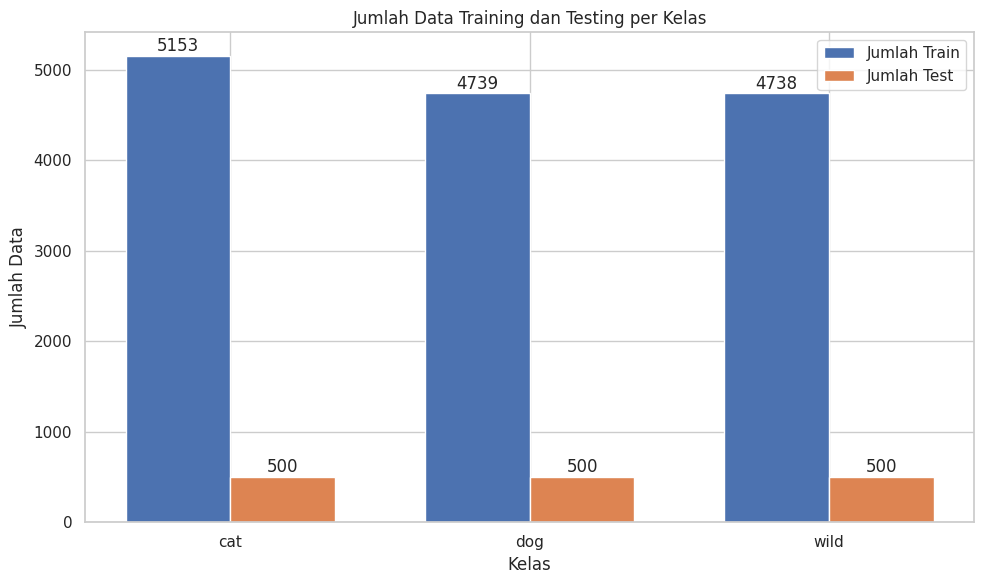

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

width = 0.35  # Lebar batang

# Membuat plot menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot untuk Jumlah_train
train_bar = np.arange(len(label))
train_plot = plt.bar(train_bar, Jumlah_train, width, label='Jumlah Train')

# Plot untuk Jumlah_test
test_bar = train_bar + width
test_plot = plt.bar(test_bar, Jumlah_test, width, label='Jumlah Test')

# Menambahkan label pada sumbu x dan sumbu y
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')

# Menambahkan label pada setiap batang
for i in range(len(label)):
    plt.text(train_bar[i], Jumlah_train[i] + 50, str(Jumlah_train[i]), ha='center')
    plt.text(test_bar[i], Jumlah_test[i] + 50, str(Jumlah_test[i]), ha='center')

# Menambahkan judul dan legend
plt.title('Jumlah Data Training dan Testing per Kelas')
plt.legend()

# Menandai posisi kelas pada sumbu x
plt.xticks(train_bar + width/2, label)

plt.tight_layout()
plt.show()

Perbandingan Data Train dan Data Test = 90% / 10%

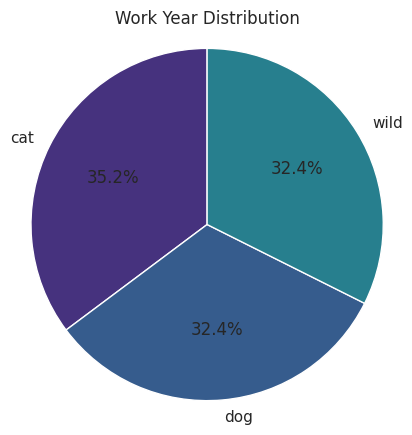

In [54]:
plt.figure(figsize=(5, 5))
plt.pie(Jumlah_train, labels=label, autopct='%1.1f%%',
        colors=sns.color_palette('viridis'), startangle=90)
plt.title('Work Year Distribution')
plt.axis('equal')
plt.show()


Proporsi Masing masing class cukup seimbang

### Visualization Image Data

In [10]:
train_dir = '/content/afhq/train/'

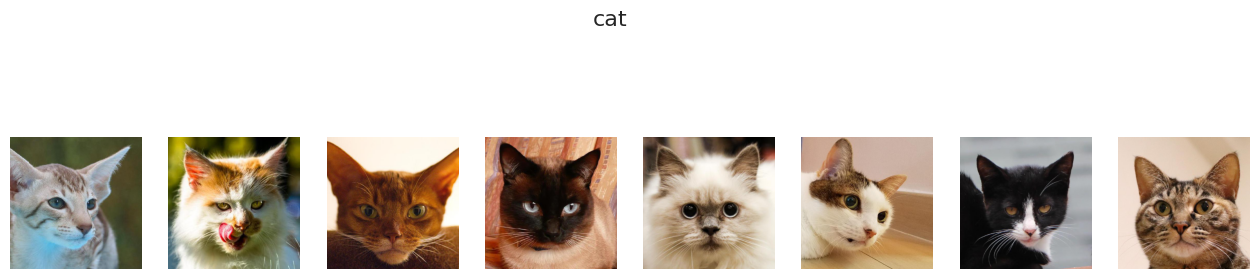

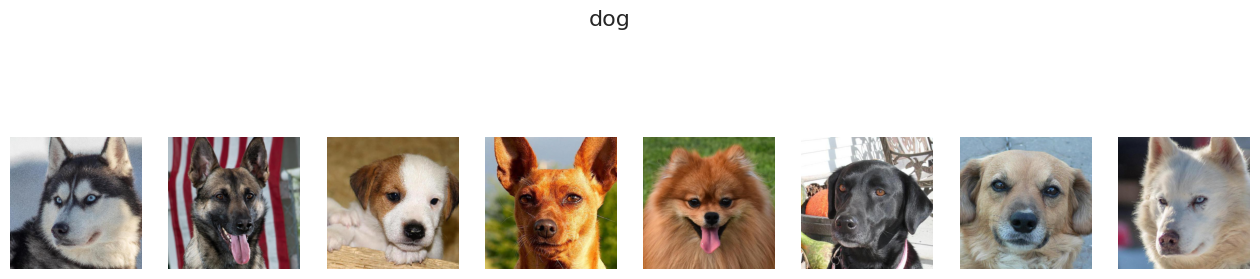

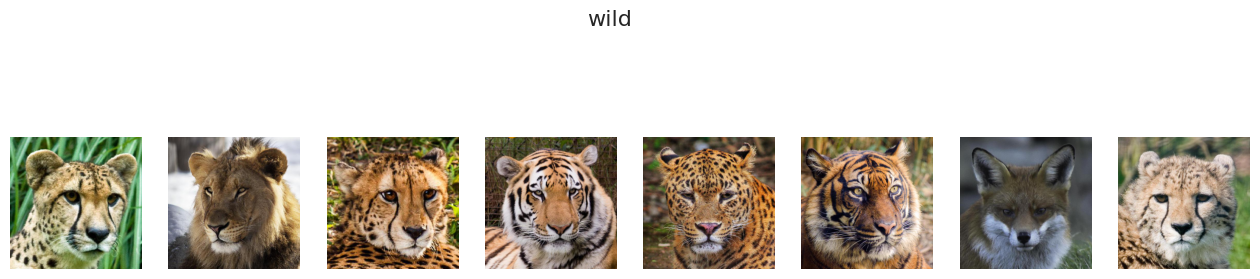

In [60]:
# View a random image from the training dataset
cat = view_random_images(target_dir=train_dir,
                        target_class="cat",
                        num_images = 8)

dog = view_random_images(target_dir=train_dir,
                        target_class="dog",
                        num_images = 8)

wild = view_random_images(target_dir=train_dir,
                        target_class="wild",
                        num_images = 8)

## Data Pre Processing

### Data Augmentation

In [61]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/afhq/train"
validation_dir = "/content/afhq/val"

train_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
validation_data = validation_datagen.flow_from_directory(validation_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 14630 images belonging to 3 classes.
Testing images:
Found 1500 images belonging to 3 classes.


# Modelling

## Model 0

In [65]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224, 3))

x = Conv2D(16, 3, activation='relu')(inputs)
x = Conv2D(16, 3, activation='relu')(x)
x = MaxPool2D()(x)

x = Conv2D(32, 3, activation='relu')(inputs)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D()(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

model_0 = Model(inputs=inputs, outputs=outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data)
                        )

Epoch 1/5
458/458 [==============================] - 95s 204ms/step - loss: 0.5278 - accuracy: 0.8272 - val_loss: 0.2386 - val_accuracy: 0.9120
Epoch 2/5
458/458 [==============================] - 92s 201ms/step - loss: 0.1469 - accuracy: 0.9484 - val_loss: 0.1992 - val_accuracy: 0.9267
Epoch 3/5
458/458 [==============================] - 91s 199ms/step - loss: 0.0633 - accuracy: 0.9786 - val_loss: 0.2507 - val_accuracy: 0.9173
Epoch 4/5
458/458 [==============================] - 91s 199ms/step - loss: 0.0406 - accuracy: 0.9859 - val_loss: 0.2600 - val_accuracy: 0.9167
Epoch 5/5
458/458 [==============================] - 93s 203ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.3260 - val_accuracy: 0.9067


In [66]:
baseModel_result = model_0.evaluate(validation_data)

47/47 [==============================] - 7s 158ms/step - loss: 0.3260 - accuracy: 0.9067


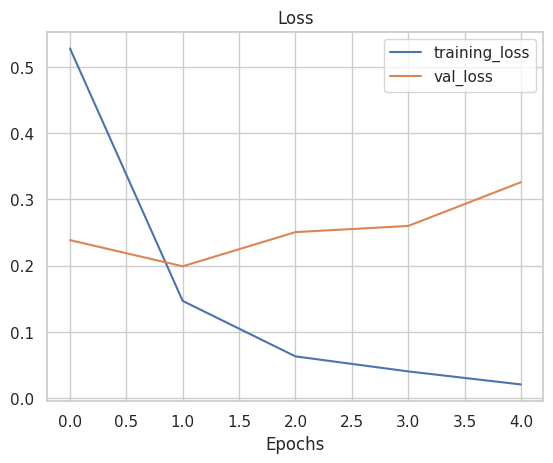

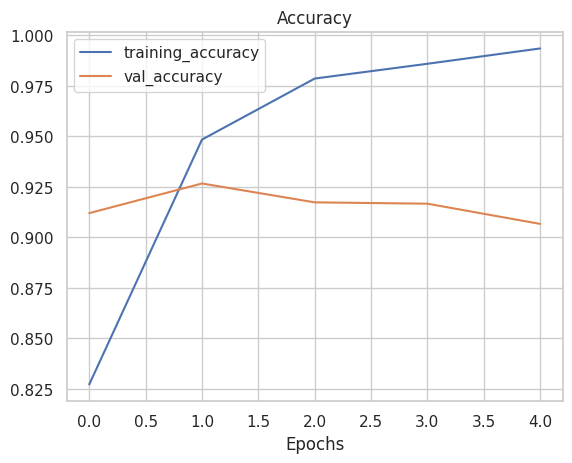

In [79]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_0)

## Model 1 (Transfer Learning)

In [67]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [68]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model


In [69]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

### Resnet

In [72]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [73]:
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  callbacks=[early_stopping]
                                  )

Epoch 1/10
458/458 [==============================] - 104s 219ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0112 - val_accuracy: 0.9967
Epoch 2/10
458/458 [==============================] - 97s 212ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.0154 - val_accuracy: 0.9933
Epoch 3/10
458/458 [==============================] - 94s 206ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0092 - val_accuracy: 0.9980
Epoch 4/10
458/458 [==============================] - 96s 210ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0082 - val_accuracy: 0.9987
Epoch 5/10
458/458 [==============================] - 95s 207ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0081 - val_accuracy: 0.9987
Epoch 6/10
458/458 [==============================] - 93s 204ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0095 - val_accuracy: 0.9973
Epoch 7/10
458/458 [==============================] - 94s 206ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0100 - val_a

In [74]:
resnet_result = resnet_model.evaluate(validation_data)

47/47 [==============================] - 9s 190ms/step - loss: 0.0081 - accuracy: 0.9987


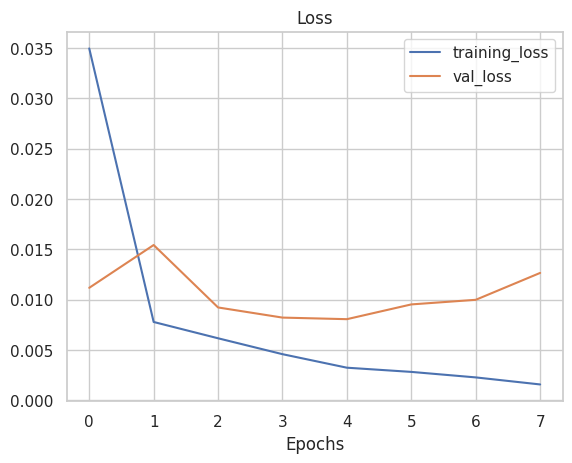

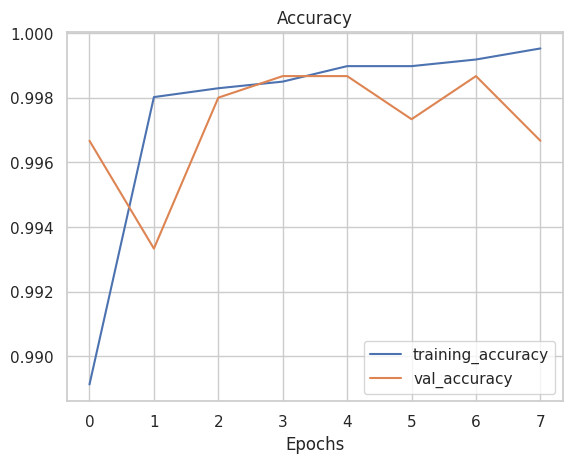

In [78]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(resnet_history)

### efficientnet

In [75]:
# Create model
efficientnet_model = create_model(efficientnet_url, num_classes=train_data.num_classes)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [76]:
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)
# Fit the model
efficientnet_history = efficientnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=validation_data,
                                  validation_steps=len(validation_data),
                                  callbacks=[early_stopping]
                                  )

Epoch 1/10
458/458 [==============================] - 103s 204ms/step - loss: 0.0596 - accuracy: 0.9883 - val_loss: 0.0140 - val_accuracy: 0.9980
Epoch 2/10
458/458 [==============================] - 93s 203ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.0091 - val_accuracy: 0.9993
Epoch 3/10
458/458 [==============================] - 91s 200ms/step - loss: 0.0063 - accuracy: 0.9988 - val_loss: 0.0074 - val_accuracy: 0.9993
Epoch 4/10
458/458 [==============================] - 92s 200ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0077 - val_accuracy: 0.9993
Epoch 5/10
458/458 [==============================] - 91s 199ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 6/10
458/458 [==============================] - 93s 202ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 7/10
458/458 [==============================] - 92s 201ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0066 - val_a

In [77]:
efficientnet_result = efficientnet_model.evaluate(validation_data)

47/47 [==============================] - 9s 189ms/step - loss: 0.0066 - accuracy: 0.9993


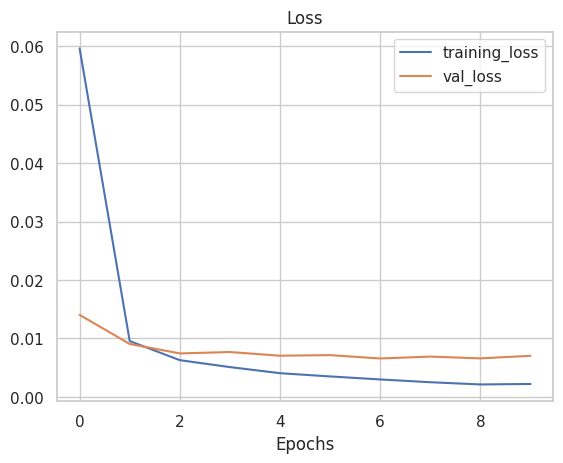

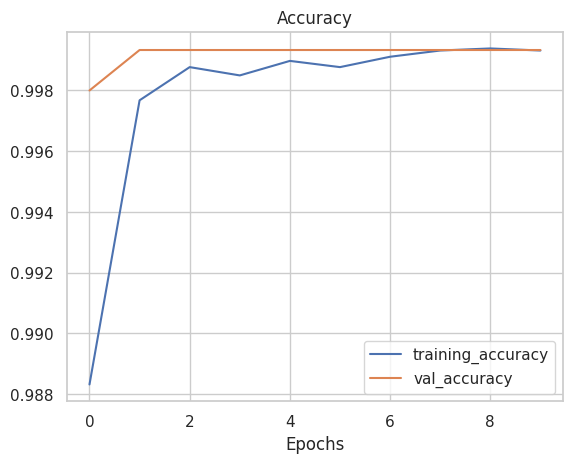

In [80]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(efficientnet_history)

# Evaluation

In [81]:
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/afhq/train") # turn our training path into a Python path
# class_names = np.array([item.name for item in data_dir.glob('*')]) # created a list of class_names from the subdirectories
class_names = np.array([item.name for item in sorted(data_dir.glob('*'))]) # created a list of class_names from the subdirectories
class_names

array(['cat', 'dog', 'wild'], dtype='<U4')

In [88]:
print(f"Akurasi Base Model = {round(baseModel_result[1],4)}")
print(f"Akurasi Resnet = {round(resnet_result[1],4)}")
print(f"Akurasi Efficientnet ={round(efficientnet_result[1],4)}")

Akurasi Base Model = 0.9067
Akurasi Resnet = 0.9987
Akurasi Efficientnet =0.9993


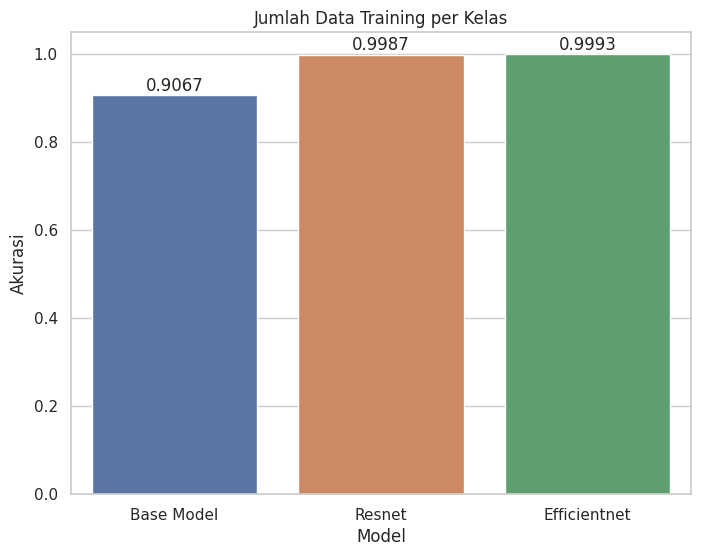

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

akurasi = [round(baseModel_result[1],4), round(resnet_result[1],4), round(efficientnet_result[1],4)]
model = ["Base Model", "Resnet", "Efficientnet"]

# Membuat plot menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=model, y=akurasi)
plt.title('Jumlah Data Training per Kelas')
plt.xlabel('Model')
plt.ylabel('Akurasi')

# Menambahkan keterangan nilai akurasi pada setiap batang
for i in range(len(akurasi)):
    plt.text(i, akurasi[i] + 0.01, str(akurasi[i]), ha='center')

plt.show()

1/1 [==============================] - 0s 36ms/step


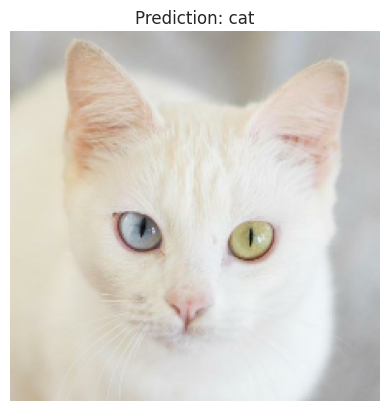

In [115]:
pred_and_plot(model=resnet_model,
              filename="/content/afhq/val/cat/flickr_cat_000016.jpg",
              class_names=class_names)